1.2. □ (0pts) Load the dataset. You can use **gzip.open** and **json.load** to do that.

In [1]:
import gzip
import json 
import pandas as pd
with gzip.open('geomotions/goemotions.json.gz', 'rb') as f:
    file_content = json.load(f) # to see what is in the file 
    

In [2]:
# Visualize the first 20 collection of posts by using enumerate
# Try and get a better idea on how to classify EMOTIONS and SENTIMENTS based on a POST 
for reddit_post, post in enumerate(file_content[:10]):
    print(reddit_post, post)
    print('\n')

0 ['That game hurt.', 'sadness', 'negative']


1 ["You do right, if you don't care then fuck 'em!", 'neutral', 'neutral']


2 ['Man I love reddit.', 'love', 'positive']


3 ['[NAME] was nowhere near them, he was by the Falcon. ', 'neutral', 'neutral']


4 ['Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!', 'gratitude', 'positive']


5 ["He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.", 'disapproval', 'negative']


6 ["That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.", 'amusement', 'positive']


7 ["that's adorable asf", 'amusement', 'positive']


8 ['"Sponge Blurb Pubs Quaw Haha GURR ha AAa!" finale is too real', 'amusement', 'positive']


9 ["I have, and now that you mention it, I think that's what triggered my nostalgia. ", 'neutral', 'neutral']




In [3]:
import pandas as pd
# Creating a pandas dataframe from a list 
df = pd.DataFrame(file_content, columns =['Post', 'Emotion', 'Sentiment'])
df.head()

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive


In [4]:
# Will use the groupby function to describe by emotion, so we can do some exploratory data analysis
emotion_table = df.groupby('Emotion').describe()
emotion_table

Post         \
                count unique   
Emotion                        
admiration      10531   6830   
amusement        6130   3877   
anger            5202   3985   
annoyance        8342   6817   
approval        11259   8917   
caring           3523   2741   
confusion        4938   3863   
curiosity        5885   4090   
desire           2147   1682   
disappointment   4706   3968   
disapproval      7686   5969   
disgust          2914   2363   
embarrassment    1433   1197   
excitement       3020   2463   
fear             1778   1295   
gratitude        7075   3909   
grief             351    311   
joy              4329   3381   
love             4957   2957   
nervousness       796    699   
neutral         55298  31446   
optimism         4519   3523   
pride             690    627   
realization      4714   4061   
relief            788    681   
remorse          1510   1113   
sadness          3827   2926   
surprise         3472   2604   

                                                                        \
                                                              top freq   
Emotion                                                                  
admiration                                        This is amazing    7   
amusement       LOL thats right, your wait for someone to hand...    5   
anger                                              [NAME] damn it    7   
annoyance                                       Weird flex but ok    5   
approval                                        I agree with this    7   
caring                                                 Bless you.    7   
confusion                                             I'm puzzled    5   
curiosity                                        Are you serious?    6   
desire          I wish they would put dfs in for [NAME] right now    5   
disappointment  I am vuri disappointed in you. You gained turd...    5   
disapproval                                               Lol no.    5   
disgust                                       You are disgusting.    6   
embarrassment   Nobody said they don't have the right. It's st...    5   
excitement                                        Happy cake day!   11   
fear                                              [NAME] is scary    6   
gratitude                                              Thank you.   45   
grief                  That poor mercy. Just died to die again xD    3   
joy                                               Happy cake day!    6   
love                                                I love [NAME]   16   
nervousness     Disney World/Land or NYE at Time's Square have...    4   
neutral                                                   [NAME].   22   
optimism                                               Good luck!   11   
pride                       Boy what an accomplishment, so proud!    5   
realization                               This is how mafia works    4   
relief          At last, someone I can share this accomplishme...    3   
remorse         I apologised an very long time ago as I was wr...    4   
sadness                                             I miss [NAME]    6   
surprise                                             oh my [NAME]    6   

               Sentiment                           
                   count unique        top   freq  
Emotion                                            
admiration         10531      1   positive  10531  
amusement           6130      1   positive   6130  
anger               5202      1   negative   5202  
annoyance           8342      1   negative   8342  
approval           11259      1   positive  11259  
caring              3523      1   positive   3523  
confusion           4938      1  ambiguous   4938  
curiosity           5885      1  ambiguous   5885  
desire              2147      1   positive   2147  
disappointment      4706      1   negative   4706  
disapproval         7686      1   negative   7686  
d

In [5]:
sentiment_table = df.groupby('Sentiment').describe()
sentiment_table

Post                               Emotion                    \
           count unique               top freq   count unique        top   
Sentiment                                                                  
ambiguous  19009  12472  Are you serious?   10   19009      4  curiosity   
negative   38545  21352     I miss [NAME]   13   38545     11  annoyance   
neutral    55298  31446           [NAME].   22   55298      1    neutral   
positive   58968  30515        Thank you.   45   58968     12   approval   

                  
            freq  
Sentiment         
ambiguous   5885  
negative    8342  
neutral    55298  
positive   11259

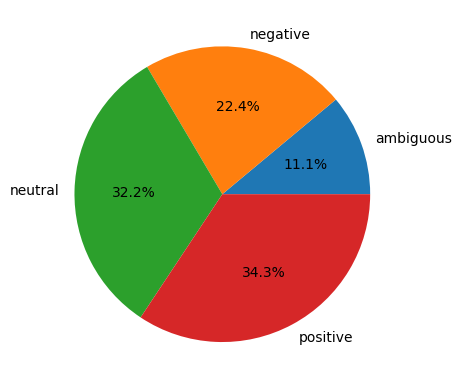

In [6]:
# Creating a pie chart based on the sentiments
import numpy as np
import matplotlib.pyplot as plt
s = sentiment_table['Post']['count'] # get the SENTIMENT column from the df dataframe 
sentiment_array = np.array(s) # create a numpy array with column from var s
my_labels = ["ambiguous", "negative", "neutral", "positive"]
plt.pie(sentiment_array, labels = my_labels, autopct='%1.1f%%')
plt.show() 

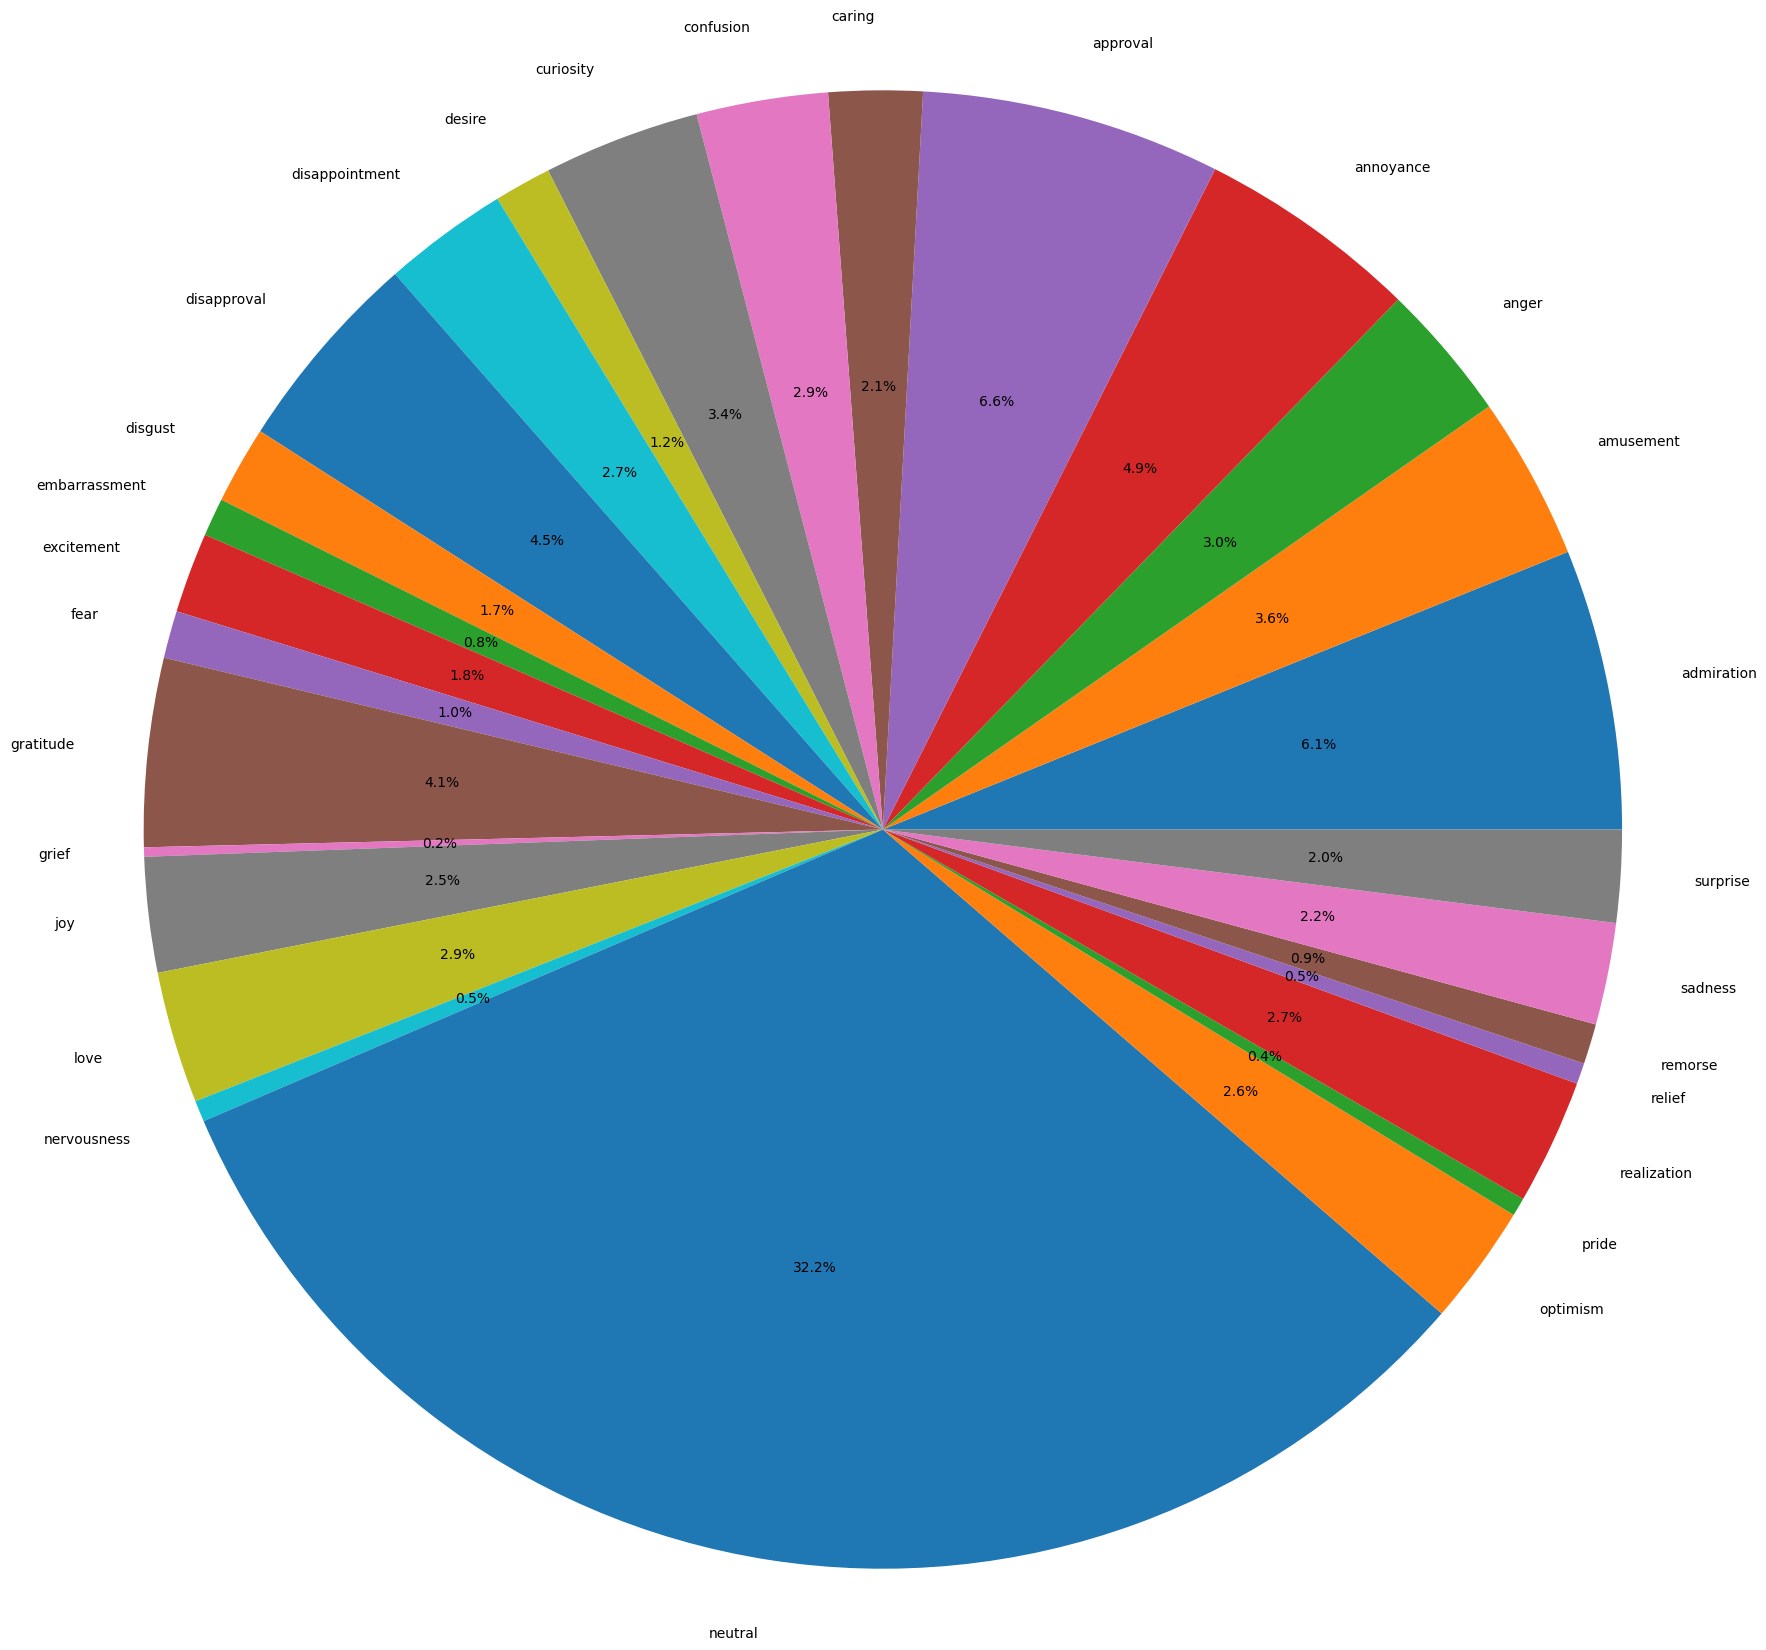

In [7]:
# Creating a pie chart based on the emotions
e = emotion_table['Post']['count'] # get the COUNT colum from the df dataframe
emotion_array = np.array(e) # create a numpy array with column from var e
my_labels = ["admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion", "curiosity", "desire",
             "disappointment", "disapproval", "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief", "joy",
             "love", "nervousness", "neutral", "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise"]
plt.pie(emotion_array, labels = my_labels, autopct='%1.1f%%', radius = 5)
plt.show() 

□ (5pts) Process the dataset using feature **extraction.text.CountVectorizer** to extract tokens/words
and their frequencies. Display the number of tokens (the size of the vocabulary) in the dataset

In [8]:
# Create two objects, X and y where X is the Posts corpus and y is the features/classes 
X = df['Post']
y = df['Sentiment']
z = df['Emotion']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Displays the number of tokens(size of the vocab)
words_display = CountVectorizer().fit(df['Post'])

print(len(words_display.vocabulary_))

30449


In [10]:
#  extract tokens/words and their frequencies
word_freq = words_display.vocabulary_
word_freq

{'that': 26899,
 'game': 11309,
 'hurt': 13362,
 'you': 30300,
 'do': 8256,
 'right': 22728,
 'if': 13530,
 'don': 8337,
 'care': 4571,
 'then': 26939,
 'fuck': 11116,
 'em': 9069,
 'man': 16377,
 'love': 16094,
 'reddit': 21940,
 'name': 17815,
 'was': 29324,
 'nowhere': 18409,
 'near': 17930,
 'them': 26929,
 'he': 12616,
 'by': 4307,
 'the': 26906,
 'falcon': 9976,
 'considering': 6087,
 'it': 14466,
 'such': 26023,
 'an': 1612,
 'important': 13703,
 'document': 8268,
 'should': 24177,
 'know': 15107,
 'damned': 7006,
 'thing': 26995,
 'backwards': 2581,
 'and': 1652,
 'forwards': 10888,
 'thanks': 26891,
 'again': 1212,
 'for': 10773,
 'help': 12745,
 'isn': 14445,
 'as': 2099,
 'big': 3218,
 'but': 4261,
 'still': 25658,
 'quite': 21477,
 'popular': 20482,
 've': 28825,
 'heard': 12653,
 'same': 23216,
 'about': 810,
 'his': 12924,
 'content': 6156,
 'never': 18073,
 'watched': 29353,
 'him': 12893,
 'much': 17629,
 'crazy': 6556,
 'went': 29528,
 'to': 27300,
 'super': 26131,
 'r

In [11]:
# Use the fit_transform method on the CountVectorizer object and pass in X
# To transform the post corpus training set into a feature vector
X = CountVectorizer().fit_transform(df['Post'])

In [12]:
X

<171820x30449 sparse matrix of type '<class 'numpy.int64'>'
	with 1936209 stored elements in Compressed Sparse Row format>

In [13]:
# To split the train and testing of the posts and emotions (hence the name of the variables)
from sklearn.model_selection import train_test_split

post_train_sentiment, post_test_sentiment, sentiment_train, sentiment_test = train_test_split(X, y, test_size=0.2)
post_train_emotions, post_test_emotions, emotions_train, emotions_test = train_test_split(X, z, test_size=0.2)

In [14]:
# Multinomial Naive Bayes Classifier
# For sentiments and emotions

from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(post_train_sentiment, sentiment_train)
emotions_detect_model = MultinomialNB().fit(post_train_emotions, emotions_train)

In [15]:
# Write to file called 'performance' for step 2.4 
# String + Confusion Matrix + classification report
from sklearn.metrics import confusion_matrix,classification_report

# For sentiments 

predictions_mnb_sentiments = sentiment_detect_model.predict(post_test_sentiment)
confusion_matrix_base_mnb_sentiments = confusion_matrix(sentiment_test,predictions_mnb_sentiments)
classifiation_report_base_mnb_sentiments = classification_report(sentiment_test,predictions_mnb_sentiments)

# For emotions

predictions_mnb_emotions = emotions_detect_model.predict(post_test_emotions)
confusion_matrix_base_mnb_emotions = confusion_matrix(emotions_test,predictions_mnb_emotions)
classifiation_report_base_mnb_emotions = classification_report(emotions_test,predictions_mnb_emotions)

In [63]:
f = open("performance.txt", "w")
f.write("Base-MNB, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_mnb_sentiments) + "\n")
f.write(str(classifiation_report_base_mnb_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write("Base-MNB, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_mnb_emotions) + "\n")
f.write(str(classifiation_report_base_mnb_emotions) + "\n\n")
f.close()

In [24]:
# Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters for sentiments 
from sklearn import tree
from sklearn import preprocessing

sentiment_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train_sentiment, sentiment_train)
emotions_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train_emotions, emotions_train)

In [ ]:
# Write to file called 'performance' for step 2.4 
# String + Confusion Matrix + classification report

# For sentiments

predictions_dt_sentiment = sentiment_detect_model_dt.predict(post_test_sentiment)
confusion_matrix_base_dt_sentiments = confusion_matrix(sentiment_test,predictions_dt_sentiment)
classifiation_report_base_dt_sentiments = classification_report(sentiment_test,predictions_dt_sentiment)

# For emotions

predictions_dt_emotions = emotions_detect_model_dt.predict(post_test_emotions)
confusion_matrix_base_dt_emotions = confusion_matrix(emotions_test,predictions_dt_emotions)
classifiation_report_base_dt_emotions = classification_report(emotions_test,predictions_dt_emotions)

In [66]:
f = open("performance.txt", "a")
f.write("Base-DT, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_dt_sentiments) + "\n")
f.write(str(classifiation_report_base_dt_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write("Base-DT, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_dt_emotions) + "\n")
f.write(str(classifiation_report_base_dt_emotions) + "\n\n")
f.close()

In [ ]:
# Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.
from sklearn.neural_network import MLPClassifier

sentiment_detect_model_mlp = MLPClassifier(max_iter= 10).fit(post_train_sentiment,sentiment_train)
emotions_detect_model_mlp = MLPClassifier(max_iter= 10).fit(post_train_emotions,emotions_train)

NameError: name 'post_train_sentiment' is not defined

In [ ]:
# Write to file called 'performance' for step 2.4 
# String + Confusion Matrix + classification report

# For sentiments

predictions_mlp_sentiment = sentiment_detect_model_mlp.predict(post_test_sentiment)
confusion_matrix_base_mlp_sentiments = confusion_matrix(sentiment_test,predictions_mlp_sentiment)
classifiation_report_base_mlp_sentiments = classification_report(sentiment_test,predictions_mlp_sentiment)

# For emotions

predictions_mlp_emotions = emotions_detect_model_mlp.predict(post_test_emotions)
confusion_matrix_base_mlp_emotions = confusion_matrix(emotions_test,predictions_dt_emotions)
classifiation_report_base_mlp_emotions = classification_report(emotions_test,predictions_mlp_emotions)

In [69]:
f = open("performance.txt", "a")
f.write("Base-MLP, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_mlp_sentiments) + "\n")
f.write(str(classifiation_report_base_mlp_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write("Base-MLP, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_mlp_emotions) + "\n")
f.write(str(classifiation_report_base_mlp_emotions) + "\n\n")
f.close()

In [70]:
# Top-MNB: a better performing Multinomial Naive Bayes Classifier found using GridSearchCV.

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0,0.5,1.0,1.5]}
grid = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# Write to file called 'performance' for step 2.4 
# String + Confusion Matrix + classification report

# For sentiments

# fitting the model for grid search 
grid_fit_mnb_sentiments = grid.fit(post_train_sentiment, sentiment_train) 
 
# print best parameter after tuning 
grid_predictions_mnb_sentiments = grid_fit_mnb_sentiments.predict(post_test_sentiment)
confusion_matrix_base_mnb_sentiments = confusion_matrix(sentiment_test,grid_predictions_mnb_sentiments)
classifiation_report_base_mnb_sentiments = classification_report(sentiment_test, grid_predictions_mnb_sentiments)

# For emotions
# fitting the model for grid search 
grid_fit_mnb_emotions = grid.fit(post_train_emotions, emotions_train) 
 
# print best parameter after tuning 
grid_predictions_mnb_emotions = grid_fit_mnb_emotions.predict(post_test_emotions)
confusion_matrix_base_mnb_emotions = confusion_matrix(emotions_test,grid_predictions_mnb_emotions)
classifiation_report_base_mnb_emotions = classification_report(emotions_test, grid_predictions_mnb_emotions)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [71]:
f = open("performance.txt", "a")
f.write("Top-MNB, param_grid = {'alpha': [0,0.5,1.0,1.5]}, sentiment classification\n")
f.write(str(confusion_matrix_base_mnb_sentiments) + "\n")
f.write(str(classifiation_report_base_mnb_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write("Top-MNB, param_grid = {'alpha': [0,0.5,1.0,1.5]}, emotion classification\n")
f.write(str(confusion_matrix_base_mnb_emotions) + "\n")
f.write(str(classifiation_report_base_mnb_emotions) + "\n\n")
f.close()

In [72]:
# Top-DT: a better performing Decision Tree found using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_DT = {
    'criterion': ['gini'],
    'max_depth': (10, 20),
    'min_samples_split': (2, 3, 4)
}

grid_dt = GridSearchCV(tree.DecisionTreeClassifier(), param_grid_DT, refit = True, verbose = 3,n_jobs=-1) 

#For sentiments

grid_fit_dt_sentiments = grid_dt.fit(post_train_sentiment, sentiment_train)

# print best parameter after tuning 
grid_predictions_dt_sentiments = grid_fit_dt_sentiments.predict(post_test_sentiment)
confusion_matrix_top_dt_sentiments = confusion_matrix(sentiment_test,grid_predictions_dt_sentiments)
classifiation_report_top_dt_sentiments = classification_report(sentiment_test, grid_predictions_dt_sentiments)

#For emotions

grid_fit_dt_emotions = grid_dt.fit(post_train_emotions, emotions_train)

# print best parameter after tuning 
grid_predictions_dt_emotions = grid_fit_dt_emotions.predict(post_test_emotions)
confusion_matrix_top_dt_sentiments = confusion_matrix(emotions_test,grid_predictions_dt_emotions)
classifiation_report_top_dt_emotions = classification_report(emotions_test, grid_predictions_dt_emotions)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
f = open("performance.txt", "a")
f.write(f"Top-DT, {param_grid_DT} , sentiment classification\n")
f.write(str(confusion_matrix_top_dt_sentiments) + "\n")
f.write(str(classifiation_report_top_dt_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write(f"Top-DT, {param_grid_DT} , emotion classification\n")
f.write(str(confusion_matrix_top_dt_sentiments) + "\n")
f.write(str(classifiation_report_top_dt_emotions) + "\n\n")
f.close()

In [74]:
# Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV

# Abousateur: change max_iter to higher number if time permits 
param_grid_mlp = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ('adam', 'sgd'),
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'max_iter': [10]
}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, refit = True, verbose = 3,n_jobs=-1)

#For sentiments

grid_fit_mlp_sentiments = grid_mlp.fit(post_train_sentiment, sentiment_train)

# print best parameter after tuning 
grid_predictions_mlp_sentiments = grid_fit_mlp_sentiments.predict(post_test_sentiment)
confusion_matrix_top_mlp_sentiments = confusion_matrix(sentiment_test,grid_predictions_mlp_sentiments)
classifiation_report_top_mlp_sentiments = classification_report(sentiment_test, grid_predictions_mlp_sentiments)

#For emotions

grid_fit_mlp_emotions = grid_mlp.fit(post_train_emotions, emotions_train)

# print best parameter after tuning 
grid_predictions_mlp_emotions = grid_fit_mlp_emotions.predict(post_test_emotions)
confusion_matrix_top_mlp_emotions = confusion_matrix(sentiment_test,grid_predictions_mlp_emotions)
classifiation_report_top_mlp_emotions = classification_report(emotions_test, grid_predictions_mlp_emotions)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
f = open("performance.txt", "a")
f.write(f"Top-MLP, {param_grid_mlp} , sentiment classification\n")
f.write(str(confusion_matrix_top_mlp_sentiments) + "\n")
f.write(str(classifiation_report_top_mlp_sentiments) + "\n\n")
f.close()

f = open("performance.txt", "a")
f.write(f"Top-MLP, {param_grid_mlp} , emotion classification\n")
f.write(str(confusion_matrix_top_mlp_emotions) + "\n")
f.write(str(classifiation_report_top_mlp_emotions) + "\n\n")
f.close()

Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer
for this. Display the results of this experiment.

In [76]:
# Do only one of the following, depending on your own interest:
# Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer
# for this. Display the results of this experiment.

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X)
posts_tfidf = tfidf_transformer.transform(X)

In [77]:
# To split the train and testing of the posts similar to before 

from sklearn.model_selection import train_test_split

post_train_sentiment, post_test_sentiment, sentiment_train, sentiment_test = train_test_split(posts_tfidf, y, test_size=0.2)
post_train_emotions, post_test_emotions, emotions_train, emotions_test = train_test_split(posts_tfidf, z, test_size=0.2)

In [78]:
# Now need to repeat all steps
# Base-MNB
sentiment_detect_model = MultinomialNB().fit(post_train_sentiment, sentiment_train)
emotions_detect_model = MultinomialNB().fit(post_train_emotions, emotions_train)

In [79]:
# For sentiments 

predictions_mnb_sentiments = sentiment_detect_model.predict(post_test_sentiment)
confusion_matrix_base_mnb_sentiments = confusion_matrix(sentiment_test,predictions_mnb_sentiments)
classifiation_report_base_mnb_sentiments = classification_report(sentiment_test,predictions_mnb_sentiments)

# For emotions

predictions_mnb_emotions = emotions_detect_model.predict(post_test_emotions)
confusion_matrix_base_mnb_emotions = confusion_matrix(emotions_test,predictions_mnb_emotions)
classifiation_report_base_mnb_emotions = classification_report(emotions_test,predictions_mnb_emotions)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
f = open("performance2.txt", "w")
f.write("Base-MNB, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_mnb_sentiments) + "\n")
f.write(str(classifiation_report_base_mnb_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write("Base-MNB, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_mnb_emotions) + "\n")
f.write(str(classifiation_report_base_mnb_emotions) + "\n\n")
f.close()

In [81]:
# Base-DT
sentiment_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train_sentiment, sentiment_train)
emotions_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train_emotions, emotions_train)

In [82]:
# For sentiments

predictions_dt_sentiment = sentiment_detect_model_dt.predict(post_test_sentiment)
confusion_matrix_base_dt_sentiments = confusion_matrix(sentiment_test,predictions_dt_sentiment)
classifiation_report_base_dt_sentiments = classification_report(sentiment_test,predictions_dt_sentiment)

# For emotions

predictions_dt_emotions = emotions_detect_model_dt.predict(post_test_emotions)
confusion_matrix_base_dt_emotions = confusion_matrix(emotions_test,predictions_dt_emotions)
classifiation_report_base_dt_emotions = classification_report(emotions_test,predictions_dt_emotions)

In [83]:
f = open("performance2.txt", "a")
f.write("Base-DT, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_dt_sentiments) + "\n")
f.write(str(classifiation_report_base_dt_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write("Base-DT, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_dt_emotions) + "\n")
f.write(str(classifiation_report_base_dt_emotions) + "\n\n")
f.close()

In [84]:
# Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.

# Abousateur: increase max_iter if time permits, like 10 at least?
sentiment_detect_model_mlp = MLPClassifier(max_iter= 10).fit(post_train_sentiment,sentiment_train)
emotions_detect_model_mlp = MLPClassifier(max_iter= 10).fit(post_train_emotions,emotions_train)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# For sentiments

predictions_mlp_sentiment = sentiment_detect_model_mlp.predict(post_test_sentiment)
confusion_matrix_base_mlp_sentiments = confusion_matrix(sentiment_test,predictions_mlp_sentiment)
classifiation_report_base_mlp_sentiments = classification_report(sentiment_test,predictions_mlp_sentiment)

# For emotions

predictions_mlp_emotions = emotions_detect_model_mlp.predict(post_test_emotions)
confusion_matrix_base_mlp_emotions = confusion_matrix(emotions_test,predictions_dt_emotions)
classifiation_report_base_mlp_emotions = classification_report(emotions_test,predictions_mlp_emotions)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f = open("performance2.txt", "a")
f.write("Base-MLP, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_mlp_sentiments) + "\n")
f.write(str(classifiation_report_base_mlp_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write("Base-MLP, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_mlp_emotions) + "\n")
f.write(str(classifiation_report_base_mlp_emotions) + "\n\n")
f.close()

In [ ]:
# Top-MNB
param_grid = {'alpha': [0,0.5,1.0,1.5]}
grid = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# Write to file called 'performance' for step 2.4 
# String + Confusion Matrix + classification report

# For sentiments

# fitting the model for grid search 
grid_fit_mnb_sentiments = grid.fit(post_train_sentiment, sentiment_train) 
 
# print best parameter after tuning 
grid_predictions_mnb_sentiments = grid_fit_mnb_sentiments.predict(post_test_sentiment)
confusion_matrix_base_mnb_sentiments = confusion_matrix(sentiment_test,grid_predictions_mnb_sentiments)
classifiation_report_base_mnb_sentiments = classification_report(sentiment_test, grid_predictions_mnb_sentiments)

# For emotions
# fitting the model for grid search 
grid_fit_mnb_emotions = grid.fit(post_train_emotions, emotions_train) 
 
# print best parameter after tuning 
grid_predictions_mnb_emotions = grid_fit_mnb_emotions.predict(post_test_emotions)
confusion_matrix_base_mnb_emotions = confusion_matrix(emotions_test,grid_predictions_mnb_emotions)
classifiation_report_base_mnb_emotions = classification_report(emotions_test, grid_predictions_mnb_emotions)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [ ]:
f = open("performance2.txt", "a")
f.write("Top-MLP, param_grid = {'alpha': [0,0.5,1.0,1.5]}, sentiment classification\n")
f.write(str(confusion_matrix_base_mnb_sentiments) + "\n")
f.write(str(classifiation_report_base_mnb_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write("Top-MLP, param_grid = {'alpha': [0,0.5,1.0,1.5]}, emotion classification\n")
f.write(str(confusion_matrix_base_mnb_emotions) + "\n")
f.write(str(classifiation_report_base_mnb_emotions) + "\n\n")
f.close()

In [ ]:
# Top-DT
param_grid_DT = {
    'criterion': ['gini'],
    'max_depth': (10, 20),
    'min_samples_split': (2, 3, 4)
}

grid_dt = GridSearchCV(tree.DecisionTreeClassifier(), param_grid_DT, refit = True, verbose = 3,n_jobs=-1) 

#For sentiments

grid_fit_dt_sentiments = grid_dt.fit(post_train_sentiment, sentiment_train)

# print best parameter after tuning 
grid_predictions_dt_sentiments = grid_fit_dt_sentiments.predict(post_test_sentiment)
confusion_matrix_top_dt_sentiments = confusion_matrix(sentiment_test,grid_predictions_dt_sentiments)
classifiation_report_top_dt_sentiments = classification_report(sentiment_test, grid_predictions_dt_sentiments)

#For emotions

grid_fit_dt_emotions = grid_dt.fit(post_train_emotions, emotions_train)

# print best parameter after tuning 
grid_predictions_dt_emotions = grid_fit_dt_emotions.predict(post_test_emotions)
confusion_matrix_top_dt_sentiments = confusion_matrix(emotions_test,grid_predictions_dt_emotions)
classifiation_report_top_dt_emotions = classification_report(emotions_test, grid_predictions_dt_emotions)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f = open("performance2.txt", "a")
f.write(f"Top-DT, {param_grid_DT} , sentiment classification\n")
f.write(str(confusion_matrix_top_dt_sentiments) + "\n")
f.write(str(classifiation_report_top_dt_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write(f"Top-DT, {param_grid_DT} , emotion classification\n")
f.write(str(confusion_matrix_top_dt_sentiments) + "\n")
f.write(str(classifiation_report_top_dt_emotions) + "\n\n")
f.close()

In [ ]:
# Top-MLP
# Abousateur: change max_iter to higher number if time permits 
param_grid_mlp = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ('adam', 'sgd'),
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'max_iter': [10]
}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, refit = True, verbose = 3,n_jobs=-1)

#For sentiments

grid_fit_mlp_sentiments = grid_mlp.fit(post_train_sentiment, sentiment_train)

# print best parameter after tuning 
grid_predictions_mlp_sentiments = grid_fit_mlp_sentiments.predict(post_test_sentiment)
confusion_matrix_top_mlp_sentiments = confusion_matrix(sentiment_test,grid_predictions_mlp_sentiments)
classifiation_report_top_mlp_sentiments = classification_report(sentiment_test, grid_predictions_mlp_sentiments)

#For emotions

grid_fit_mlp_emotions = grid_mlp.fit(post_train_emotions, emotions_train)

# print best parameter after tuning 
grid_predictions_mlp_emotions = grid_fit_mlp_emotions.predict(post_test_emotions)
confusion_matrix_top_mlp_emotions = confusion_matrix(sentiment_test,grid_predictions_mlp_emotions)
classifiation_report_top_mlp_emotions = classification_report(emotions_test, grid_predictions_mlp_emotions)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f = open("performance2.txt", "a")
f.write(f"Top-MLP, {param_grid_mlp} , sentiment classification\n")
f.write(str(confusion_matrix_top_mlp_sentiments) + "\n")
f.write(str(classifiation_report_top_mlp_sentiments) + "\n\n")
f.close()

f = open("performance2.txt", "a")
f.write(f"Top-MLP, {param_grid_mlp} , emotion classification\n")
f.write(str(confusion_matrix_top_mlp_emotions) + "\n")
f.write(str(classifiation_report_top_mlp_emotions) + "\n\n")
f.close()

# Embeddings as Features

In [16]:
# Use gensim.downloader.load to load the word2vec-google-news-300 pretrained embedding model.
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

In [17]:
# Use the tokenizer from nltk to extract words from the Reddit posts. Display the number of tokens in the training set.
from nltk import word_tokenize

list_of_posts = df['Post']

nb_of_tokens = 0
list_of_posts_tokenized = []

for post in list_of_posts:
    post_tokenized = word_tokenize(post) 
    list_of_posts_tokenized.append(post_tokenized) 
    nb_of_tokens += len(post_tokenized)
    
# print(list_of_posts_tokenized)
print(nb_of_tokens)


2642128


In [18]:
# Compute the embedding of a Reddit post as the average of the embeddings of its words. If a word has no embedding in Word2Vec, skip it.
reddit_posts_embeddings=[]
for post in list_of_posts_tokenized:
    words_with_embeddings = [word for word in post if word in model.key_to_index] # If a word has no embedding in Word2Vec, remove it 
    # if (len(words_with_embeddings) == 0):
    #     continue
    embeddings_vector=[0.0] * 300
    for word in words_with_embeddings:
        embeddings_vector+=model[word]

    i = 0
    for x in embeddings_vector:
        embeddings_vector[i] = x/len(embeddings_vector)
        # if i == 0:
        #     print(len(words_with_embeddings))
        #     print(embeddings_vector[i])
        i += 1

    
    reddit_posts_embeddings.append(embeddings_vector)
    

len(reddit_posts_embeddings)

171820

In [19]:
# Compute and display the overall hit rates of the training and test sets (i.e. the % of words in the Reddit posts for which an embedding is found in Word2Vec

train_post, test_post = train_test_split(list_of_posts_tokenized, test_size=0.2)

nb_of_hits_train = 0
nb_of_hits_test = 0
nb_of_posts_train = 0
nb_of_posts_test = 0

for post in train_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_train += len(words_with_embeddings)
    nb_of_posts_train += len(post)

for post in test_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_test += len(words_with_embeddings)
    nb_of_posts_test += len(post)
    

hit_rates_train = nb_of_hits_train/nb_of_posts_train * 100
hit_rates_test = nb_of_hits_test/nb_of_posts_test * 100

print(hit_rates_train)
print(hit_rates_test)


77.43684530149476
77.50589242813511


In [20]:
# Train a Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.
from sklearn.neural_network import MLPClassifier

emb_post_train_sentiment, emb_post_test_sentiment, emb_sentiment_train, emb_sentiment_test = train_test_split(reddit_posts_embeddings, y ,test_size=0.2)
emb_post_train_emotion, emb_post_test_emotion, emb_emotion_train, emb_emotion_test = train_test_split(reddit_posts_embeddings, z ,test_size=0.2)

emb_sentiment_detect_model_mlp = MLPClassifier().fit(emb_post_train_sentiment, emb_sentiment_train)
emb_emotions_detect_model_mlp = MLPClassifier().fit(emb_post_train_emotion, emb_emotion_train)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Write to file called 'performance' for step 3.7
# String + Confusion Matrix + classification report

# For sentiments

predictions_emb_mlp_sentiment = emb_sentiment_detect_model_mlp.predict(emb_post_test_sentiment)
confusion_matrix_base_emb_mlp_sentiments = confusion_matrix(emb_sentiment_test,predictions_emb_mlp_sentiment)
classifiation_report_base_emb_mlp_sentiments = classification_report(emb_sentiment_test,predictions_emb_mlp_sentiment)

# For emotions

predictions_emb_mlp_emotion = emb_emotions_detect_model_mlp.predict(emb_post_test_emotion)
confusion_matrix_base_emb_mlp_emotions = confusion_matrix(emb_emotion_test,predictions_emb_mlp_emotion)
classifiation_report_base_emb_mlp_emotions = classification_report(emb_emotion_test,predictions_emb_mlp_emotion)


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

In [22]:
f = open("performance3.txt", "a")
f.write("Embeddings as Features\n\n")
f.write("Base-MLP, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_emb_mlp_sentiments) + "\n")
f.write(str(classifiation_report_base_emb_mlp_sentiments) + "\n\n")
f.close()

f = open("performance3.txt", "a")
f.write("Base-MLP, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_emb_mlp_emotions) + "\n")
f.write(str(classifiation_report_base_emb_mlp_emotions) + "\n\n")
f.close()

In [24]:
# Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_emb_mlp = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ('adam', 'sgd'),
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)]
}

grid_emb_mlp = GridSearchCV(MLPClassifier(), param_grid_emb_mlp, refit = True, verbose = 3,n_jobs=-1)

#For sentiments

grid_fit_emb_mlp_sentiments = grid_emb_mlp.fit(emb_post_train_sentiment, emb_sentiment_train)

# print best parameter after tuning 
grid_predictions_emb_mlp_sentiments = grid_fit_emb_mlp_sentiments.predict(emb_post_test_sentiment)
confusion_matrix_emb_top_mlp_sentiments = confusion_matrix(emb_sentiment_test,grid_predictions_emb_mlp_sentiments)
classifiation_report_emb_top_mlp_sentiments = classification_report(emb_sentiment_test, grid_predictions_emb_mlp_sentiments)

#For emotions

grid_fit_emb_mlp_emotions = grid_emb_mlp.fit(emb_post_train_emotion, emb_emotion_train)

# print best parameter after tuning 
grid_predictions_emb_mlp_emotions = grid_fit_emb_mlp_emotions.predict(emb_post_test_emotion)
confusion_matrix_emb_top_mlp_emotions = confusion_matrix(emb_sentiment_test, grid_predictions_emb_mlp_emotions)
classifiation_report_emb_top_mlp_emotions = classification_report(emb_emotion_test, grid_predictions_emb_mlp_emotions)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classif

In [ ]:
f = open("performance3.txt", "a")
f.write(f"Top-MLP, {param_grid_emb_mlp} , sentiment classification\n")
f.write(str(confusion_matrix_emb_top_mlp_sentiments) + "\n")
f.write(str(classifiation_report_emb_top_mlp_sentiments) + "\n\n")
f.close()

f = open("performance3.txt", "a")
f.write(f"Top-MLP, {param_grid_emb_mlp} , emotion classification\n")
f.write(str(confusion_matrix_emb_top_mlp_emotions) + "\n")
f.write(str(classifiation_report_emb_top_mlp_emotions) + "\n\n")
f.close()

Do Your Own Exploration (with Base-MLP)

Using 'fasttext-wiki-news-subwords-300' pretrained embedding model

In [51]:
#Using 'fasttext-wiki-news-subwords-300' pretrained embedding model
model = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [52]:
list_of_posts = df['Post']

nb_of_tokens = 0
list_of_posts_tokenized = []

for post in list_of_posts:
    post_tokenized = word_tokenize(post) 
    list_of_posts_tokenized.append(post_tokenized) 
    nb_of_tokens += len(post_tokenized)
    
# print(list_of_posts_tokenized)
print(nb_of_tokens)

2642128


In [53]:
# Compute the embedding of a Reddit post as the average of the embeddings of its words. If a word has no embedding in Word2Vec, skip it.
reddit_posts_embeddings=[]
for post in list_of_posts_tokenized:
    words_with_embeddings = [word for word in post if word in model.key_to_index] # If a word has no embedding in Word2Vec, remove it 
    # if (len(words_with_embeddings) == 0):
    #     continue
    embeddings_vector=[0.0] * 300
    for word in words_with_embeddings:
        embeddings_vector+=model[word]

    i = 0
    for x in embeddings_vector:
        embeddings_vector[i] = x/len(embeddings_vector)
        # if i == 0:
        #     print(len(words_with_embeddings))
        #     print(embeddings_vector[i])
        i += 1

    
    reddit_posts_embeddings.append(embeddings_vector)
    

len(reddit_posts_embeddings)

171820

In [54]:
# Compute and display the overall hit rates of the training and test sets (i.e. the % of words in the Reddit posts for which an embedding is found in Word2Vec

train_post, test_post = train_test_split(list_of_posts_tokenized, test_size=0.2)

nb_of_hits_train = 0
nb_of_hits_test = 0
nb_of_posts_train = 0
nb_of_posts_test = 0

for post in train_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_train += len(words_with_embeddings)
    nb_of_posts_train += len(post)

for post in test_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_test += len(words_with_embeddings)
    nb_of_posts_test += len(post)
    

hit_rates_train = nb_of_hits_train/nb_of_posts_train * 100
hit_rates_test = nb_of_hits_test/nb_of_posts_test * 100

print(hit_rates_train)
print(hit_rates_test)

98.05012940217894
97.988385615798


In [55]:
# Train a Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.
from sklearn.neural_network import MLPClassifier

emb_post_train_sentiment, emb_post_test_sentiment, emb_sentiment_train, emb_sentiment_test = train_test_split(reddit_posts_embeddings, y ,test_size=0.2)
emb_post_train_emotion, emb_post_test_emotion, emb_emotion_train, emb_emotion_test = train_test_split(reddit_posts_embeddings, z ,test_size=0.2)

emb_sentiment_detect_model_mlp = MLPClassifier().fit(emb_post_train_sentiment, emb_sentiment_train)
emb_emotions_detect_model_mlp = MLPClassifier().fit(emb_post_train_emotion, emb_emotion_train)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# Write to file called 'performance' for step 3.7 
# String + Confusion Matrix + classification report

# For sentiments

predictions_emb_mlp_sentiment = emb_sentiment_detect_model_mlp.predict(emb_post_test_sentiment)
confusion_matrix_base_emb_mlp_sentiments = confusion_matrix(emb_sentiment_test,predictions_emb_mlp_sentiment)
classifiation_report_base_emb_mlp_sentiments = classification_report(emb_sentiment_test,predictions_emb_mlp_sentiment)

# For emotions

predictions_emb_mlp_emotion = emb_emotions_detect_model_mlp.predict(emb_post_test_emotion)
confusion_matrix_base_emb_mlp_emotions = confusion_matrix(emb_emotion_test,predictions_emb_mlp_emotion)
classifiation_report_base_emb_mlp_emotions = classification_report(emb_emotion_test,predictions_emb_mlp_emotion)



C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
f = open("performance4.txt", "a")
f.write("Using fasttext-wiki-news-subwords-300\n\n")
f.write("Base-MLP, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_emb_mlp_sentiments) + "\n")
f.write(str(classifiation_report_base_emb_mlp_sentiments) + "\n\n")
f.close()

f = open("performance4.txt", "a")
f.write("Base-MLP, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_emb_mlp_emotions) + "\n")
f.write(str(classifiation_report_base_emb_mlp_emotions) + "\n\n")
f.close()

Using 'glove-wiki-gigaword-300' pretrained embedding model

In [44]:
#Using glove-wiki-gigaword-300 pretrained embedding model
model = api.load('glove-wiki-gigaword-300')



In [45]:
list_of_posts = df['Post']

nb_of_tokens = 0
list_of_posts_tokenized = []

for post in list_of_posts:
    post_tokenized = word_tokenize(post) 
    list_of_posts_tokenized.append(post_tokenized) 
    nb_of_tokens += len(post_tokenized)
    
# print(list_of_posts_tokenized)
print(nb_of_tokens)

2642128


In [46]:
# Compute the embedding of a Reddit post as the average of the embeddings of its words. If a word has no embedding in Word2Vec, skip it.
reddit_posts_embeddings=[]
for post in list_of_posts_tokenized:
    words_with_embeddings = [word for word in post if word in model.key_to_index] # If a word has no embedding in Word2Vec, remove it 
    # if (len(words_with_embeddings) == 0):
    #     continue
    embeddings_vector=[0.0] * 300
    for word in words_with_embeddings:
        embeddings_vector+=model[word]

    i = 0
    for x in embeddings_vector:
        embeddings_vector[i] = x/len(embeddings_vector)
        # if i == 0:
        #     print(len(words_with_embeddings))
        #     print(embeddings_vector[i])
        i += 1

    
    reddit_posts_embeddings.append(embeddings_vector)
    

len(reddit_posts_embeddings)

171820

In [47]:
# Compute and display the overall hit rates of the training and test sets (i.e. the % of words in the Reddit posts for which an embedding is found in Word2Vec

train_post, test_post = train_test_split(list_of_posts_tokenized, test_size=0.2)

nb_of_hits_train = 0
nb_of_hits_test = 0
nb_of_posts_train = 0
nb_of_posts_test = 0

for post in train_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_train += len(words_with_embeddings)
    nb_of_posts_train += len(post)

for post in test_post:
    words_with_embeddings = [word for word in post if word in model.key_to_index]
    nb_of_hits_test += len(words_with_embeddings)
    nb_of_posts_test += len(post)
    

hit_rates_train = nb_of_hits_train/nb_of_posts_train * 100
hit_rates_test = nb_of_hits_test/nb_of_posts_test * 100

print(hit_rates_train)
print(hit_rates_test)

85.33071762661024
85.39392123092797


In [48]:
# Train a Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.
from sklearn.neural_network import MLPClassifier

emb_post_train_sentiment, emb_post_test_sentiment, emb_sentiment_train, emb_sentiment_test = train_test_split(reddit_posts_embeddings, y ,test_size=0.2)
emb_post_train_emotion, emb_post_test_emotion, emb_emotion_train, emb_emotion_test = train_test_split(reddit_posts_embeddings, z ,test_size=0.2)

emb_sentiment_detect_model_mlp = MLPClassifier().fit(emb_post_train_sentiment, emb_sentiment_train)
emb_emotions_detect_model_mlp = MLPClassifier().fit(emb_post_train_emotion, emb_emotion_train)

C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
# Write to file called 'performance' for step 3.7 
# String + Confusion Matrix + classification report

# For sentiments

predictions_emb_mlp_sentiment = emb_sentiment_detect_model_mlp.predict(emb_post_test_sentiment)
confusion_matrix_base_emb_mlp_sentiments = confusion_matrix(emb_sentiment_test,predictions_emb_mlp_sentiment)
classifiation_report_base_emb_mlp_sentiments = classification_report(emb_sentiment_test,predictions_emb_mlp_sentiment)

# For emotions

predictions_emb_mlp_emotion = emb_emotions_detect_model_mlp.predict(emb_post_test_emotion)
confusion_matrix_base_emb_mlp_emotions = confusion_matrix(emb_emotion_test,predictions_emb_mlp_emotion)
classifiation_report_base_emb_mlp_emotions = classification_report(emb_emotion_test,predictions_emb_mlp_emotion)



C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
f = open("performance4.txt", "a")
f.write("Using glove-wiki-gigaword-300\n\n")
f.write("Base-MLP, default parameters, sentiment classification\n")
f.write(str(confusion_matrix_base_emb_mlp_sentiments) + "\n")
f.write(str(classifiation_report_base_emb_mlp_sentiments) + "\n\n")
f.close()

f = open("performance4.txt", "a")
f.write("Base-MLP, default parameters, emotion classification\n")
f.write(str(confusion_matrix_base_emb_mlp_emotions) + "\n")
f.write(str(classifiation_report_base_emb_mlp_emotions) + "\n\n")
f.close()